In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from sklearn.metrics import accuracy_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import ipywidgets as widgets
import io
import os
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Folder paths

In [4]:
x_train = []
y_train = []

img_size = 150
labels = ['glioma','meningioma','notumor','pituitary']

for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(img_size,img_size))
        x_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(img_size,img_size))
        x_train.append(img)
        y_train.append(i)
x_train = np.array(x_train)
y_train = np.array(y_train)

In [5]:
x_train,y_train = shuffle(x_train,y_train,random_state = 101)
x_train.shape

(7023, 150, 150, 3)

Train Test Split

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x_train,
                                                 y_train,
                                                 test_size = 0.1,
                                                random_state = 101)
x_train.shape

(6320, 150, 150, 3)

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

In [8]:
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [9]:
model = Sequential()
#size and RGB channel = (150,150,3)
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = (150,150,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))

# softmax is used for probability
#output layer is dense and only 4 parameters because we have only 4 type of categories

model.add(Dense(4, activation = 'softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [11]:
# we are dealing categories so we use categorical_crossentropy i.e more than two values
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [12]:
history = model.fit(x_train,y_train, epochs = 20, validation_split = 0.1)

Epoch 1/20


2023-05-02 02:31:38.591537: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


178/178 [==============================] - 21s 58ms/step - loss: 1.6441 - accuracy: 0.3824 - val_loss: 1.2327 - val_accuracy: 0.4383
Epoch 2/20
178/178 [==============================] - 10s 53ms/step - loss: 0.8172 - accuracy: 0.6612 - val_loss: 1.0742 - val_accuracy: 0.5601
Epoch 3/20
178/178 [==============================] - 9s 53ms/step - loss: 0.6731 - accuracy: 0.7243 - val_loss: 0.8883 - val_accuracy: 0.6155
Epoch 4/20
178/178 [==============================] - 9s 52ms/step - loss: 0.5508 - accuracy: 0.7720 - val_loss: 0.8635 - val_accuracy: 0.6772
Epoch 5/20
178/178 [==============================] - 9s 52ms/step - loss: 0.4408 - accuracy: 0.8300 - val_loss: 0.7637 - val_accuracy: 0.7437
Epoch 6/20
178/178 [==============================] - 9s 53ms/step - loss: 0.3660 - accuracy: 0.8655 - val_loss: 0.5835 - val_accuracy: 0.7547
Epoch 7/20
178/178 [==============================] - 9s 52ms/step - loss: 0.3207 - accuracy: 0.8748 - val_loss: 0.4712 - val_accuracy: 0.8022
Epoch 8/

In [13]:
model.save('brainTumour.h5')

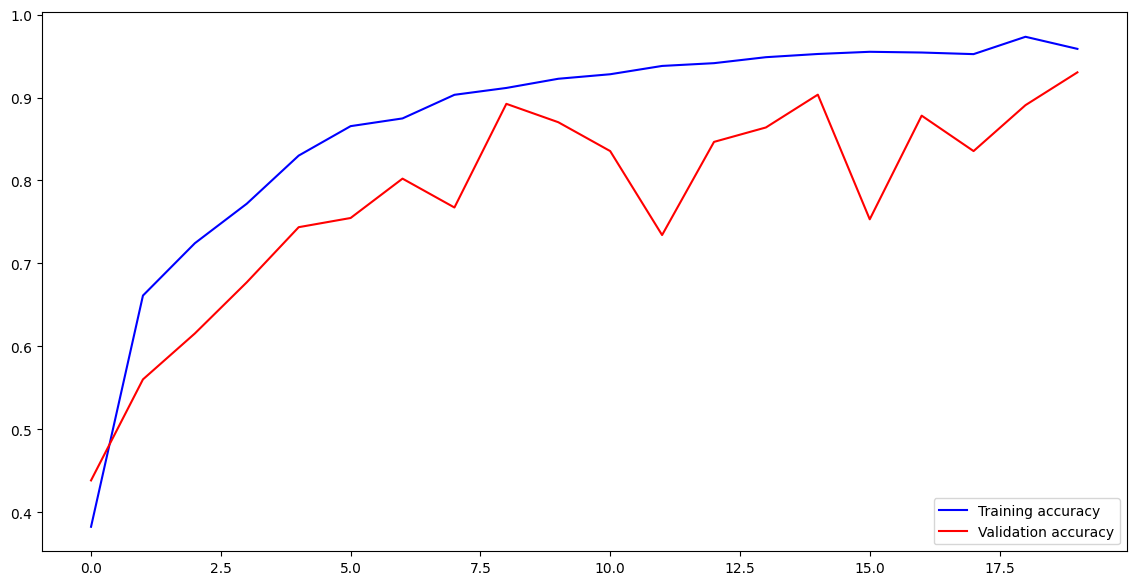

In [20]:
accu = history.history['accuracy']
val_accu = history.history['val_accuracy']
epochs = range(len(accu))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs,accu,'b',label = 'Training accuracy')
plt.plot(epochs,val_accu,'r',label = 'Validation accuracy')
plt.legend(loc='lower right')
plt.show()

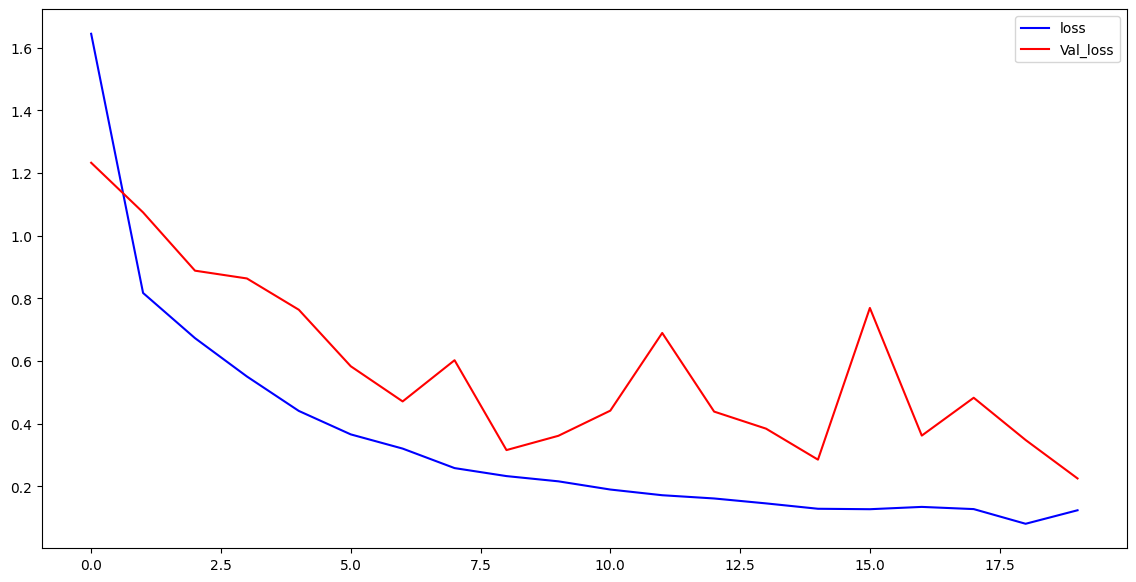

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs,loss,'b',label = 'loss')
plt.plot(epochs,val_loss,'r',label = 'Val_loss')
plt.legend(loc='upper right')
plt.show()

prediction

In [23]:
img = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-piTr_0003.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [25]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

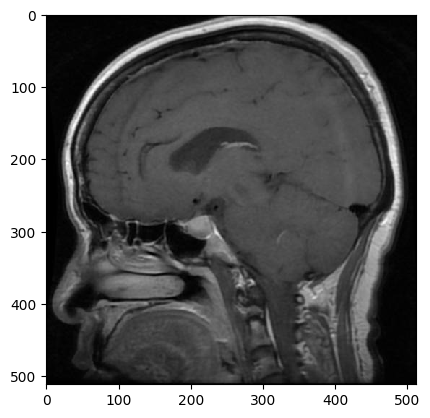

In [27]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-piTr_0003.jpg')
plt.imshow(img,interpolation = 'nearest')
plt.show()

In [28]:
a = model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 241ms/step


3